In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_os = predictions("omisego_price.csv")
df_os.data = df_os.data.reindex(index=df_os.data.index[::-1])

                Open      High       Low     Close     Volume   Market Cap  \
2017-07-14  0.534731  0.775406  0.500232  0.582480   7,50,698            -   
2017-07-15  0.586446  0.652156  0.433351  0.433351  15,52,730            -   
2017-07-16  0.431081  0.494342  0.319695  0.384906  17,43,630  4,23,80,400   
2017-07-17  0.381684  0.598633  0.379345  0.582786  42,73,090  3,75,24,100   
2017-07-18  0.574224  0.894874  0.565539  0.759819  83,94,650  5,64,53,100   

                Mean  
2017-07-14  0.598212  
2017-07-15  0.526326  
2017-07-16  0.407506  
2017-07-17  0.485612  
2017-07-18  0.698614  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2017-07-14 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          222 non-null float64
High          222 non-null float64
Low           222 non-null float64
Close         222 non-null float64
Volume        222 non-null object
Market Cap    222 non-nu

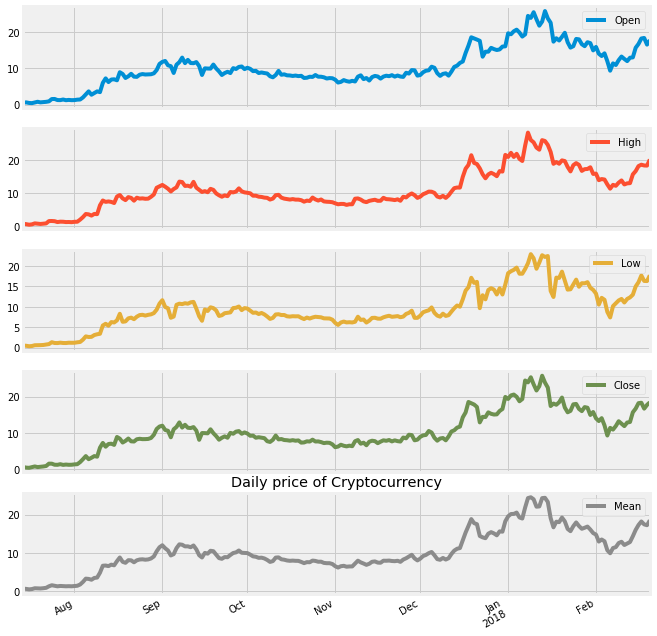

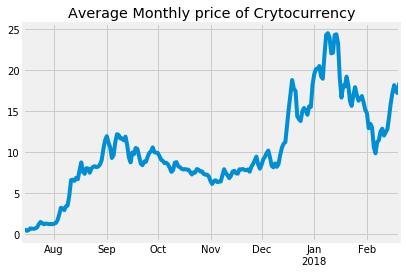

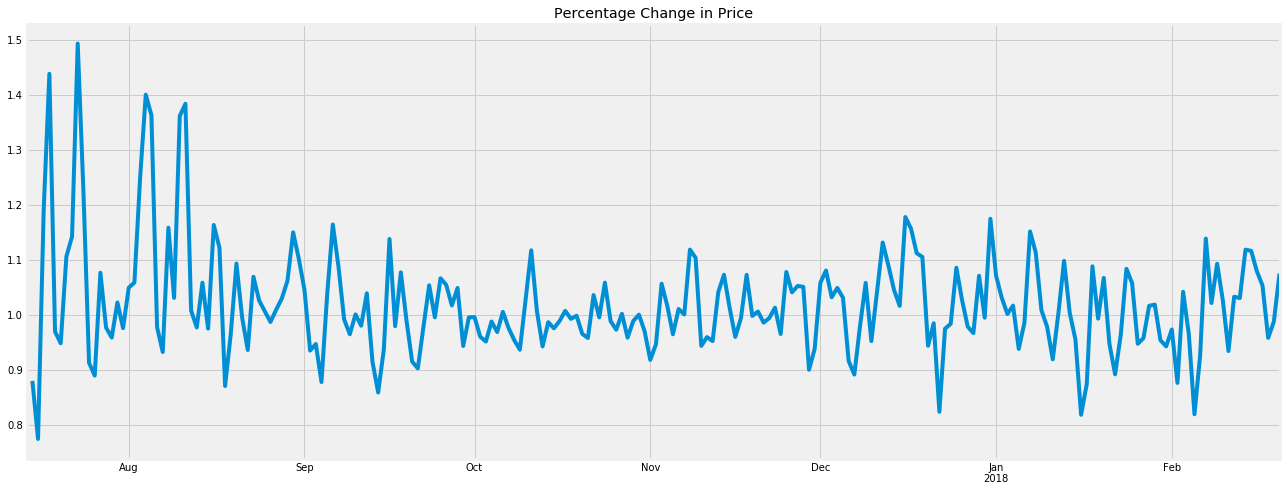

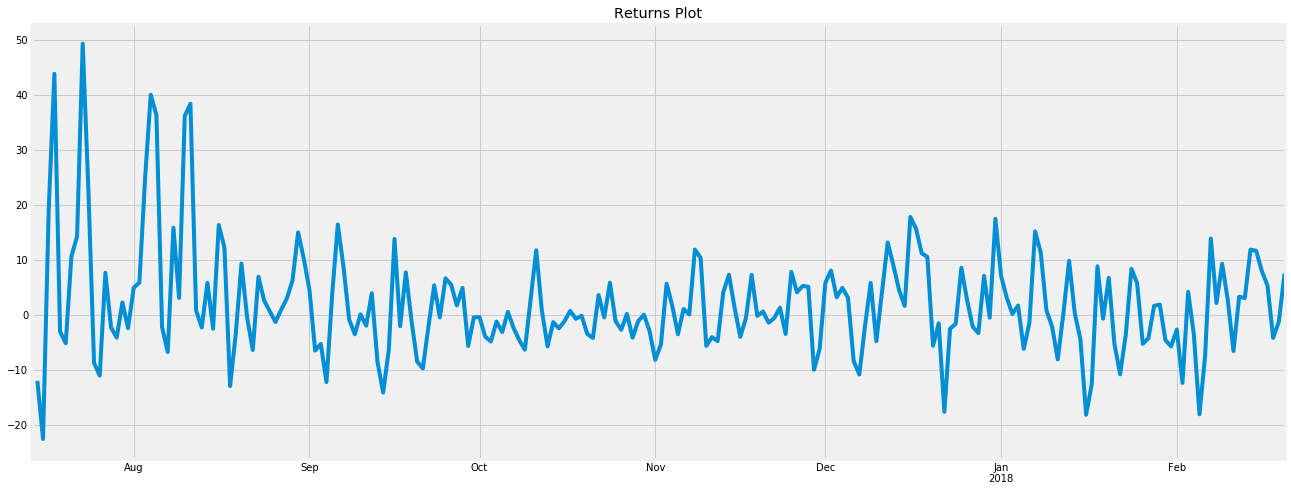

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


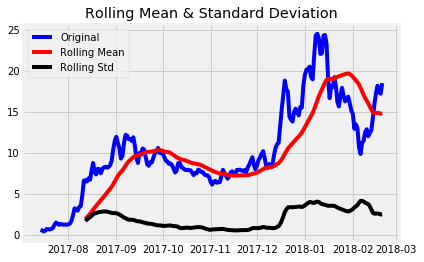

Results of Dickey-Fuller Test
Test Statistic                  -1.694761
p-value                          0.433814
#Lags Used                      14.000000
Number of Observations Used    207.000000
Critical Value(1%)              -3.462342
Critical Value(5%)              -2.875606
Critical Value(10%)             -2.574267
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.982068
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.517
P-value                         0.525
Lags                               15
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_os.description()
df_os.missing()
df_os.plot_daily()
df_os.plot_monthly()
df_os.Percent_change()
df_os.Returns()
df_os.stationarity_test()

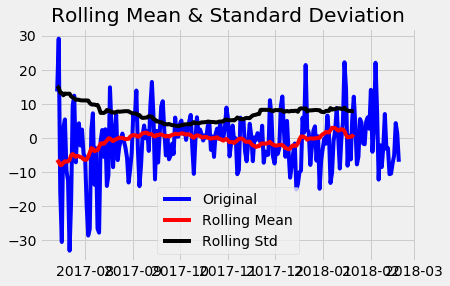

Results of Dickey-Fuller Test
Test Statistic                  -4.830023
p-value                          0.000048
#Lags Used                       6.000000
Number of Observations Used    214.000000
Critical Value(1%)              -3.461282
Critical Value(5%)              -2.875143
Critical Value(10%)             -2.574020
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.313722
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [4]:
from Model import *
os_ret = model(df_os.data)
os_ret.stationarity_test()

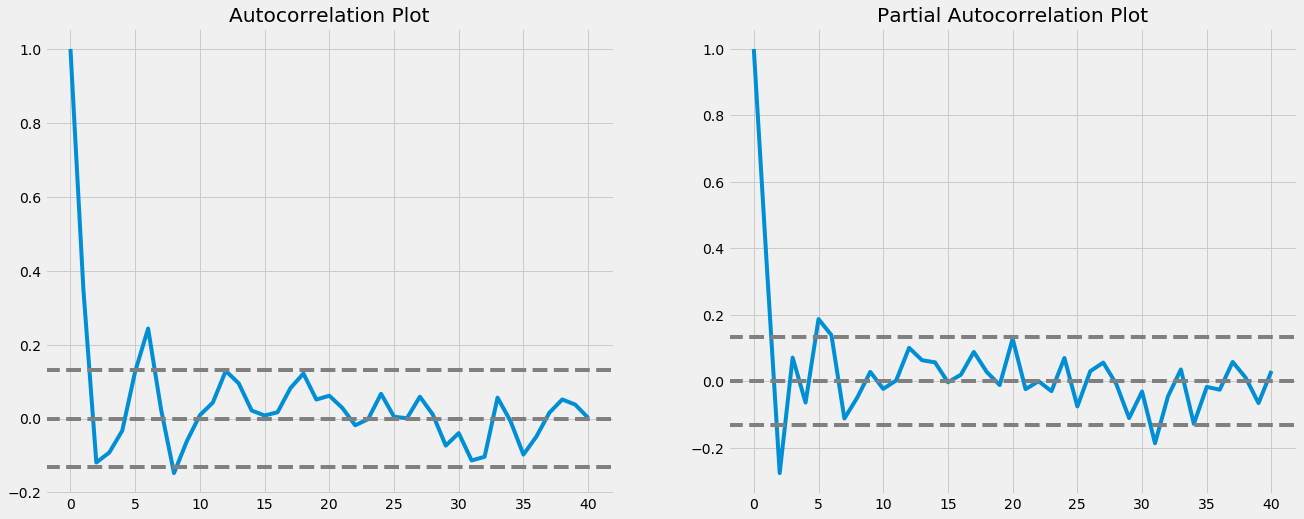

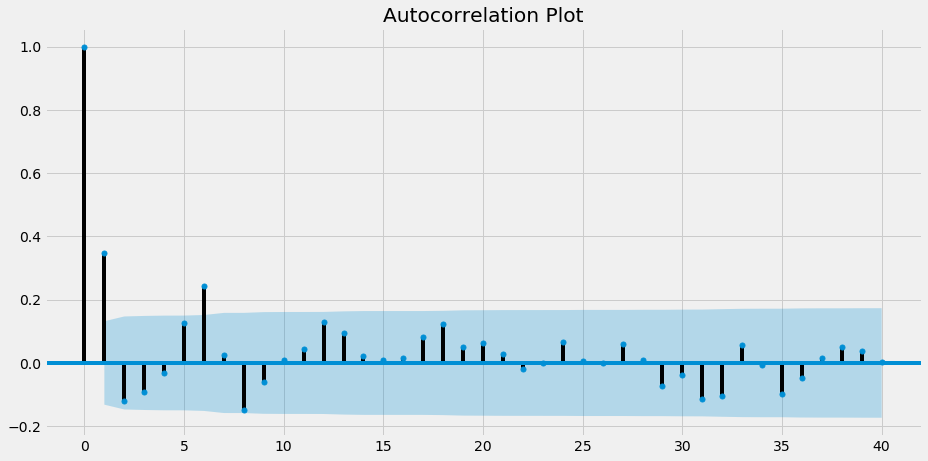

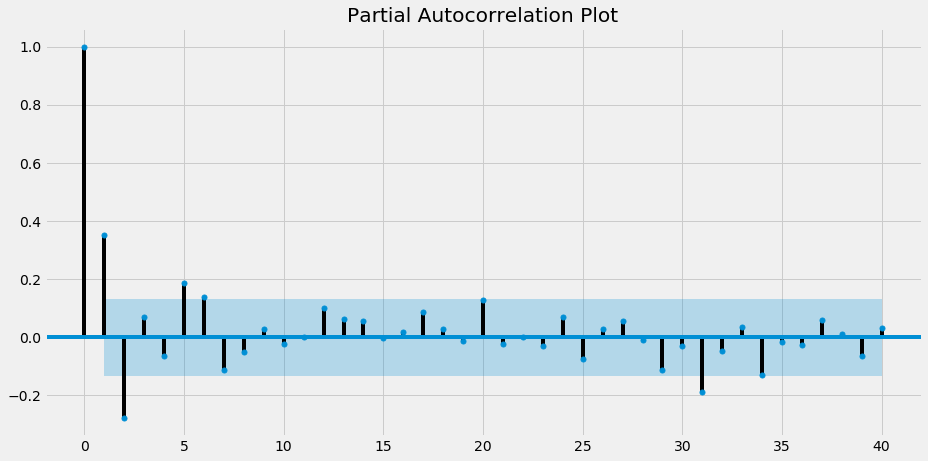

In [5]:
os_ret.lags()
os_ret.auto_graphics()
os_ret.partial_graphics()

                           Results: ARMA
Model:              ARMA             BIC:                 1561.3008 
Dependent Variable: Returns          Log-Likelihood:      -769.85   
Date:               2019-10-18 18:03 Scale:               1.0000    
No. Observations:   221              Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       218                                   07-14-2017
Converged:          1.0000           S.D. of innovations: 7.876     
No. Iterations:     8.0000           HQIC:                1553.197  
AIC:                1547.7082                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const             -1.1498    0.7606  -1.5117  0.1321  -2.6405  0.3410
ar.L1.Returns     -0.1040    0.1166  -0.8919  0.3735  -0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


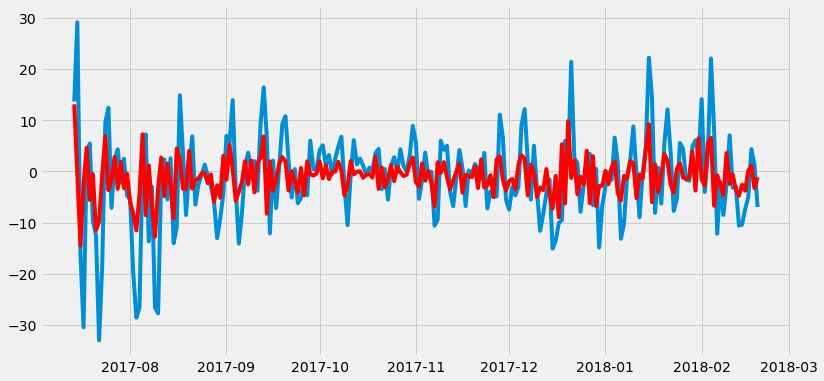

In [6]:
os_ret.ARIMA_model(1,1)
os_ret.plot_predict()

In [4]:
df_os.data = df_os.data['2017-01-01':]

In [6]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
os_sarima = produce_predict(df_os.data)

In [7]:
os_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:1713.2124277638522
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:1365.6705804475691
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:1228.3186700584388
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:1004.978312665134
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:1236.670959311826
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:1150.4513867944324
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:1017.6784566894744
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:1004.8122497497902
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:1424.8437553457907
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:1121.3530996350887
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:992.8745396223616
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:806.8984720306887
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:1006.5695433140379
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:919.2952076206374
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:826.301818040504
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:808.684579769504
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:571.0783523803859
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:513.627379559951
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:648.8

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 30) - AIC:514.6832587622348
ARIMA(0, 1, 0)x(1, 0, 1, 30) - AIC:514.6158063054044
ARIMA(0, 1, 0)x(1, 1, 0, 30) - AIC:486.0483916258663
ARIMA(0, 1, 0)x(1, 1, 1, 30) - AIC:472.64503372603957
ARIMA(0, 1, 1)x(0, 0, 0, 30) - AIC:536.5931685901169
ARIMA(0, 1, 1)x(0, 0, 1, 30) - AIC:486.2196494125516
ARIMA(0, 1, 1)x(0, 1, 0, 30) - AIC:596.1739297129955
ARIMA(0, 1, 1)x(0, 1, 1, 30) - AIC:438.3170015667207
ARIMA(0, 1, 1)x(1, 0, 0, 30) - AIC:489.9176978052275
ARIMA(0, 1, 1)x(1, 0, 1, 30) - AIC:488.07225112961964
ARIMA(0, 1, 1)x(1, 1, 0, 30) - AIC:460.21597116821846
ARIMA(0, 1, 1)x(1, 1, 1, 30) - AIC:445.8003714196926
ARIMA(1, 0, 0)x(0, 0, 0, 30) - AIC:574.3490365385135


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:519.7653518798994
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:650.5309590361996
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:471.8103761200373
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:516.2489993649019
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:517.9893516391885
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:485.5146072062672


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:489.3210705173359
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:540.1579311022563


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:490.1362484327068
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:595.9253012102275
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:441.29790815534193
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:491.90688250124794
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:491.78903809803205
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:458.97750875352943


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:459.62421923741607
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:544.655681889466
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:493.56197509856634
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:603.2319834892776
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:444.36061685997066
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:493.56347439012893
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:495.30034910458403
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:461.6800762131654
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:453.31279705592215
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:538.4234653478225
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:488.0211910107424
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:593.726159232183
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:439.5229569764843
ARIMA(1, 1, 1)x(1, 0, 0, 30) - AIC:489.83162041502436
ARIMA(1, 1, 1)x(1, 0, 1, 30) - AIC:489.90292203352055
ARIMA(1, 1, 1)x(1, 1, 0, 30) - AIC:458.68805869646496
ARIMA(1, 1, 1)x(1, 1, 1, 30) - AIC:447.5722382091503


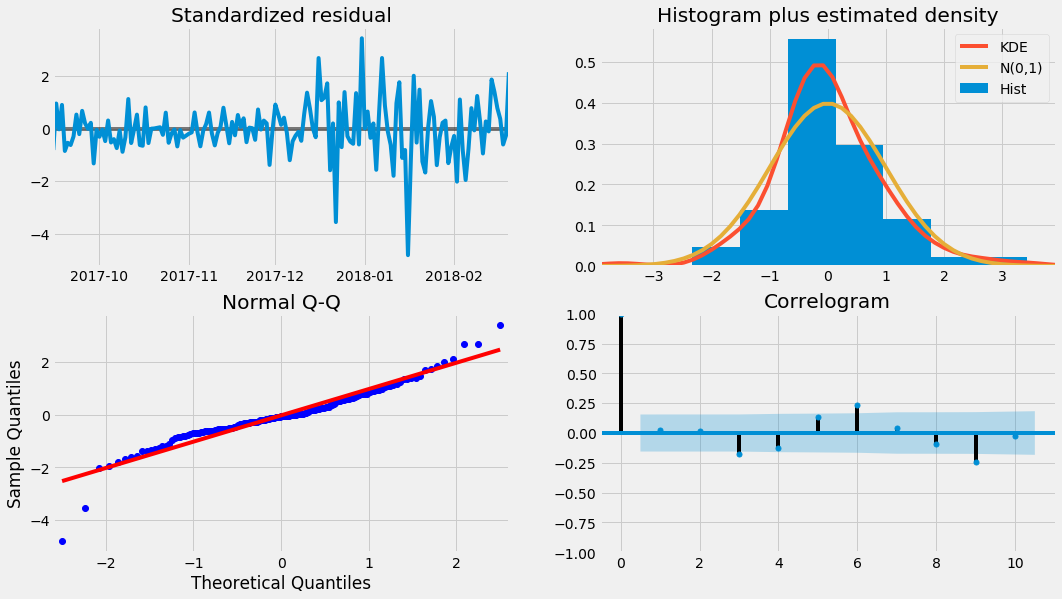

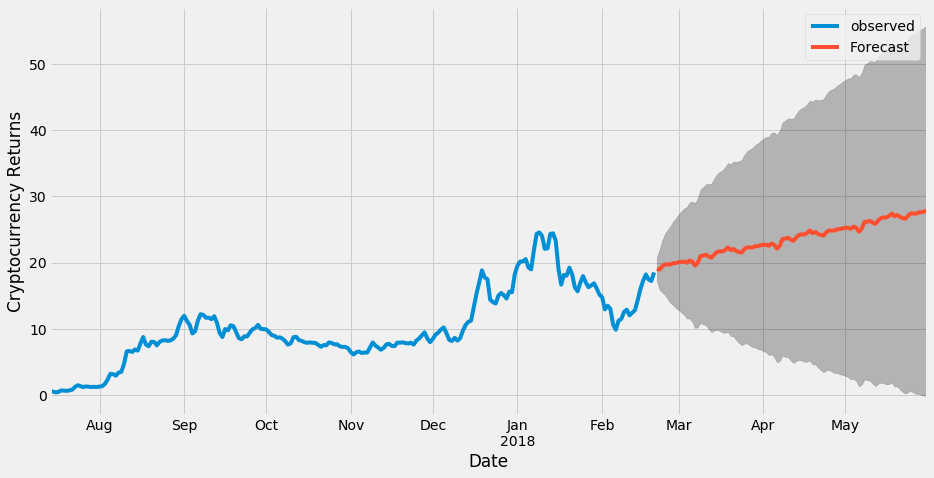

In [8]:
os_sarima.sarima_model((0,1,1),(0,1,1,30))
os_sarima.diagnostics()
os_sarima.produce_forecast()

In [9]:
from fbprophet import Prophet
from prophet_model import *
os_pro = prophet_model("omisego_price.csv",0)

<Figure size 1296x432 with 0 Axes>

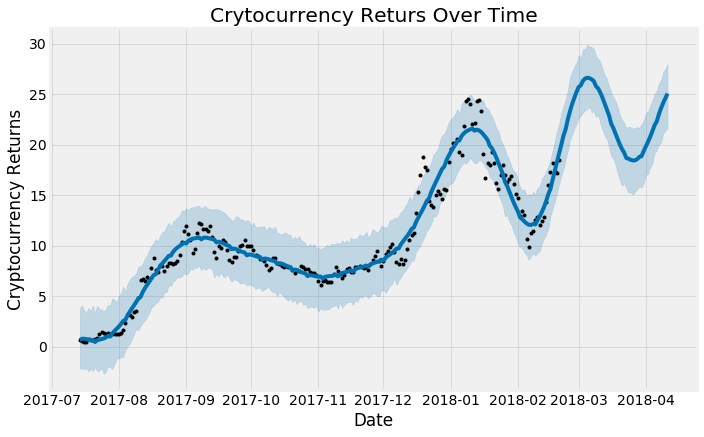

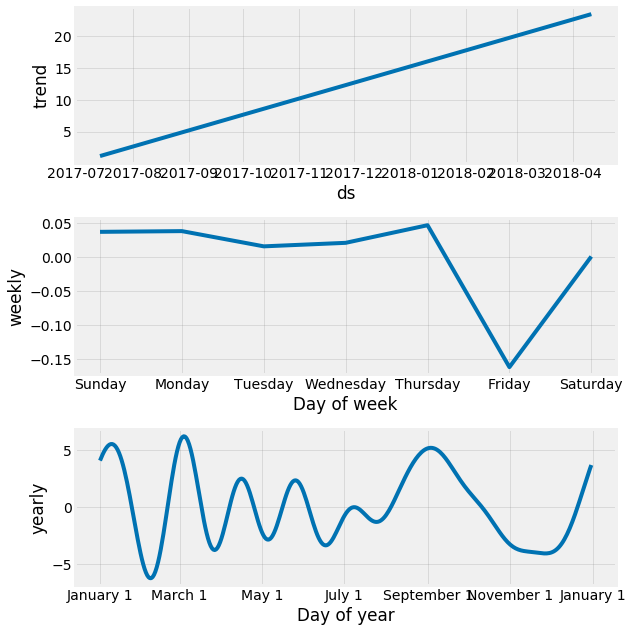

In [10]:
os_pro.model()
os_pro.forecast()
os_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_os.data)

C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


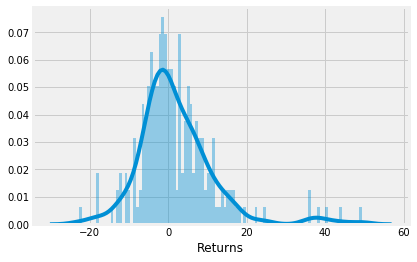

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -10.6866
95%                           -14.286
99%                           -21.038


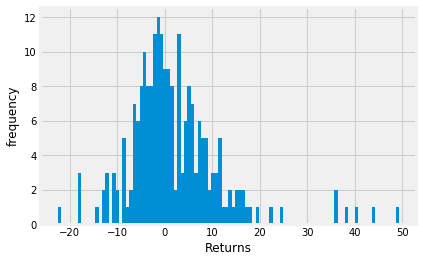

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -6.75676
95%                          -10.8614
99%                          -17.9968


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  -157.91532293800412
